In [1]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###################################################
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
###########################################


# colors
blue, orange, magenta, grey, green = '#0db4c3', '#eea021', '#ff0364', '#606172', '#3fb532'

# ===========================================================================


#long to run???
jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")






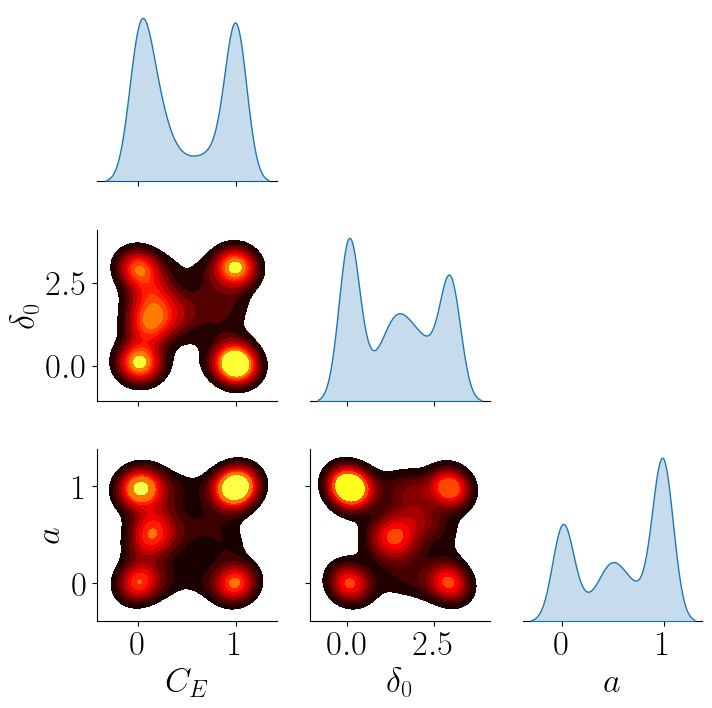

In [12]:
sampler_name = 'sampler_likelihood3_N30_L10_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample30 = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")
#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample30...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

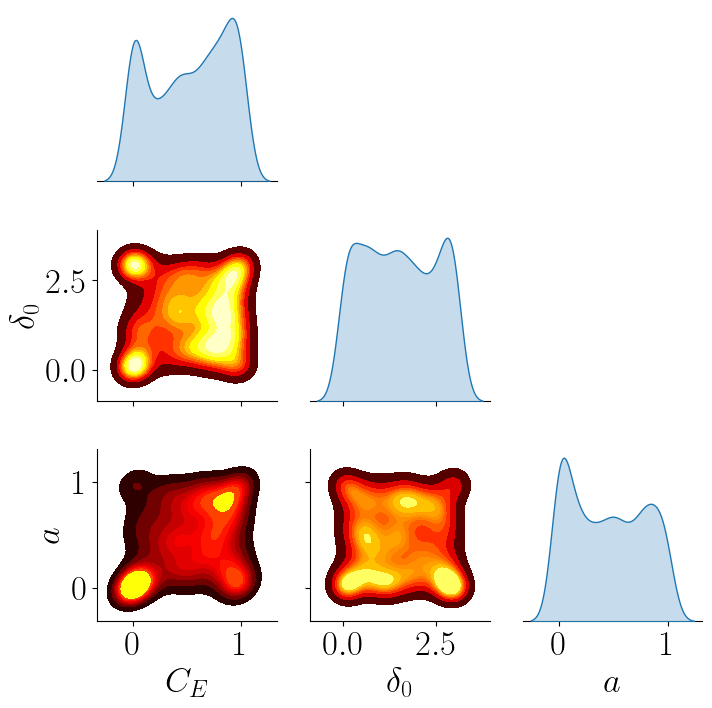

In [ ]:
sampler_name = 'sampler_likelihood3_N500_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

Load sampler and sample


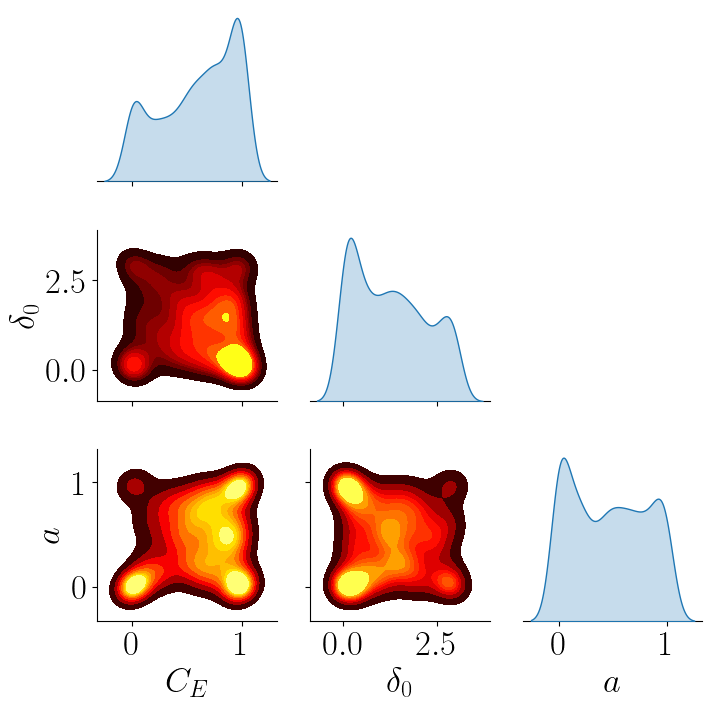

In [18]:
sampler_name = 'sampler_likelihood3_N300_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample1 = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample1...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()